# Categorizing Coding Languages with README Files
Mathias Boissevain | Stephen Kipkurui | Braeden Wright | Craig Calzado 

# Project Goal

**For this project we are building a model that can predict the main programming language of a repository, given the text of the README file. We will use 100 different README files from repositories available on GitHub, and use Natural Language Processing on the text within to build our model.  We will fisrt attempt to determine if the repo represents one of the top (3,5,?) coding languages used overall, then using a seperate model we will narrow down which language is most likely being used(all based on what is written in the README file)**

# Planning
* Setup repository environment (.gitignore, README.md)
* Make sure the .json/.csv file containing the dataset is accessible
* Import and test our acquire and wrangle functions



# Executive Summary
***We explored the data and discovered:***



***Recommandations:***



***Next Step:***
- Acquire a larger random sample of github repositories for increased accuracy on model
- Identify different features to further access README file(such as if there is a graphic in the README)
- 
--------------
## Import Menagerie

In [1]:
# Basics
import numpy as np
import pandas as pd
import nltk
import re
import os
import json

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Speciality
from typing import Dict, List, Optional, Union, cast
import requests
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer


# Custom
import base_acquire
import wrangle

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Acquire the data

**We acquired the data from repositories found on GitHub, and pulled them into a dataframe using web scrapping and functions from our acquire.py file and saved the data in a .json file**

In [2]:
# Pull dataframe
if os.path.exists('data.json'):
    print('Reading data from json file...')
    df = pd.read_json('data.json')
else:
    print('Scrapping data from Github...')
    df = pd.DataFrame(base_acquire.scrape_github_data())
    # download cleaned data to a .json
    df.to_json('data.json')
    
df.head()

Reading data from json file...


,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."


In [3]:
# Clean the README text
df['clean_text'] = df['readme_contents'].apply(wrangle.clean).apply(' '.join)
df['language'] = df['language'].str.lower()

# Feature Engineer README length
df['text_length'] = df.clean_text.apply(len)
df.head()

,repo,language,readme_contents,clean_text,text_length
0,ccxt/ccxt,javascript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...,53807
1,openssl/openssl,c,Engines\n=======\n\nDeprecation Note\n--------...,engine deprecation note engine api introduced ...,10357
2,HelloZeroNet/ZeroNet,javascript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...,3866
3,freqtrade/freqtrade,python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...,7995
4,amark/gun,javascript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...,14774


# Data Wrangle

* Using publicly available repositories from Github, 
* Using function from wrangle.py, cleaned the data                     
* Download cleaned data to a .json

# Data Exploration 

### Initial Questions
- What are the most common words in READMEs?

- Does the length of the README vary by programming language?

- Do different programming languages use a different number of unique words?

- Are there any words that uniquely identify a programming language?
--------
--------
## What are the most common words in READMEs?

In [4]:
# Set up word counts dataframe
all_text = ' '.join(df.clean_text)
javascript_text = ' '.join(df[df.language == 'javascript'].clean_text)
python_text = ' '.join(df[df.language == 'python'].clean_text)
html_text = ' '.join(df[df.language == 'html'].clean_text)
cplusplus_text = ' '.join(df[df.language == 'c++'].clean_text)
java_text = ' '.join(df[df.language == 'java'].clean_text)

In [5]:
all_text = wrangle.clean(all_text)
javascript_text = wrangle.clean(javascript_text)
python_text = wrangle.clean(python_text)
html_text = wrangle.clean(html_text)
cplusplus_text = wrangle.clean(cplusplus_text)
java_text = wrangle.clean(java_text)

In [6]:
all_freq = pd.Series(str(all_text).split()).value_counts()
javascript_freq = pd.Series(str(javascript_text).split()).value_counts()
python_freq = pd.Series(str(python_text).split()).value_counts()
html_freq = pd.Series(str(html_text).split()).value_counts()
cplusplus_freq = pd.Series(str(cplusplus_text).split()).value_counts()
java_freq = pd.Series(str(java_text).split()).value_counts()

In [8]:
word_counts = pd.concat([all_freq, javascript_freq, python_freq, html_freq, cplusplus_freq, java_freq], sort=True, axis=1)
word_counts.columns = ['all', 'javascript', 'python', 'html', 'c++', 'java']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [13]:
top_25 = word_counts.sort_values(by='all', ascending=False).head(25)
top_25

,all,javascript,python,html,c++,java
"'data',",623,73,63,266,31,18
"'version',",410,179,19,25,43,16
"'use',",401,91,61,28,52,14
"'run',",343,106,34,24,41,16
"'code',",333,61,37,44,70,11
"'project',",316,59,68,54,34,8
"'build',",309,65,11,5,87,12
"'using',",299,78,34,34,26,10
"'install',",295,85,68,15,58,4
"'file',",292,60,26,39,39,14


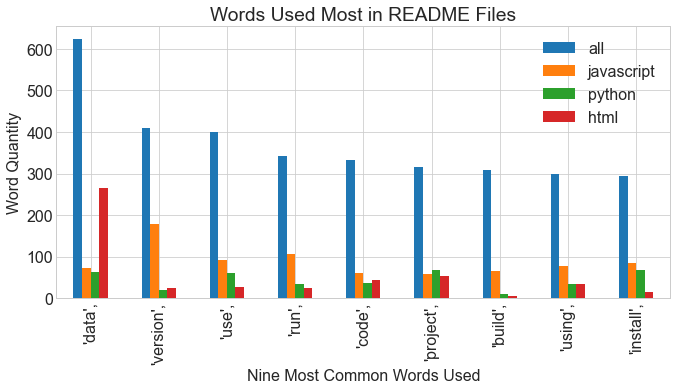

In [17]:
# Visualize word distribution
word_counts.sort_values(by='all', ascending=False)[['all', 'javascript', 'python', 'html']].head(9).plot.bar()
plt.title('Words Used Most in README Files')
plt.xlabel('Nine Most Common Words Used')
plt.ylabel('Word Quantity')
plt.show()

**Takeaways:**
* While not common, there are two or 3 words that lean heavily towards one programing language over another. ('Data' for example makes the repo most likely HTML)
-----------
## Does the length of the README vary by programming language?

In [18]:
# Thankfully we've already feature engineeer a column containing the REAME length
# We can quickly look into this one
df.text_length.describe()

count      132.000000
mean      5786.871212
std       7012.838453
min         67.000000
25%       2029.750000
50%       3799.000000
75%       7329.250000
max      53807.000000
Name: text_length, dtype: float64

Text(0.5, 0, '')

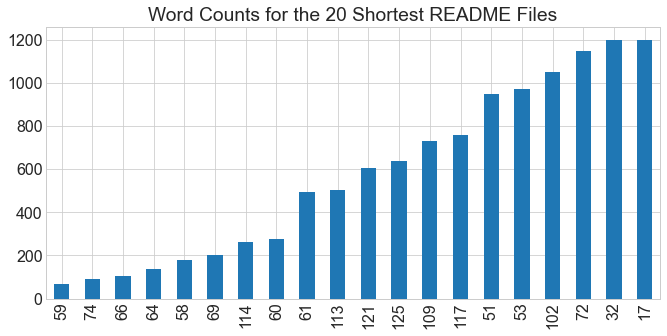

In [39]:
# Shortest 20 REAME(s)
df.clean_text.apply(len).sort_values().head(20).plot.bar()
plt.title('Word Counts for the 20 Shortest README Files')
plt.xlabel('Repository (Index Number)')
plt.ylabel('')

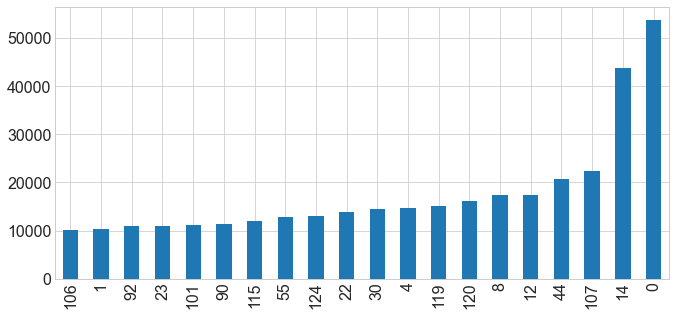

In [32]:
# Longest 20 README(s)
df.clean_text.apply(len).sort_values().tail(20).plot.bar()
plt.title('Word Counts for the 20 Longest README Files')
plt.xlabel('Repository (Index Number)')

**Takeaways:**
* Largest README sizes reach up to over 53,000 words but most of the larger README's average between 10,000 and 20,000
* Smallest README sizes a much shorter, with the bottom 8 being less than 300 words long
* The smaller README files average at about 600 words per file.
-----------
## Do different programming languages use a different number of unique words?

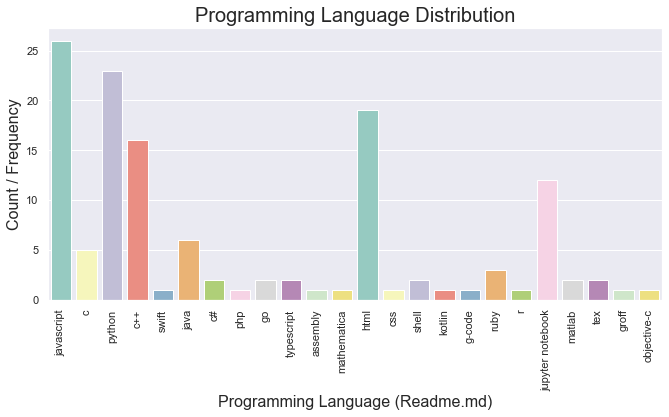

In [47]:
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="language", data=df, palette="Set3")
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Programming Language (Readme.md)', size = 16)
ax.set_ylabel('Count / Frequency', size = 16)
ax.set_title("Programming Language Distribution", size = 20)
None

**Takeaways:**
* tbd
-----------
## Are there any words that uniquely identify a programming language?

**Takeaways:**
* tbd
-----------
# Conclusion 

# Key Findings From Exploration

# Recommendation

* tbd
* tbd
* tbd

# Next Step

* Acquire a larger random sample of github repositories for increased accuracy on model


* Identify different features to further access README file
    * graphic or visualization in the README
    * Coding example in the README


* (THIRD THING)